### Inner Joins

1. Inner Join - 
2. the most common one
3. When connecting two tables with INNER JOIN, only the rows from the tables that match on the joining columns will show up in the results
4. 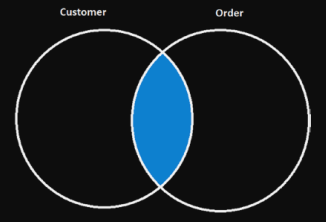
5. syntax

> > SELECT \<SELECT LIST\>  
> > <span style="color: var(--vscode-foreground);">FROM &lt;TABLE 1&gt; [INNER] JOIN &lt;TABLE 2&gt;<br></span><span style="color: var(--vscode-foreground);">ON &lt;TABLE1&gt;.&lt;COL1&gt;=&lt;TABLE2&gt;.&lt;COL2&gt;</span>

In [ ]:
SELECT H.SalesOrderID, H.OrderDate, H.TotalDue, D.SalesOrderDetailID, D.ProductID, D.OrderQty
FROM Sales.SalesOrderHeader AS H 
INNER JOIN Sales.SalesOrderDetail AS D ON H.SalesOrderID=D.SalesOrderID

This query returns all the rows from table 1 that have one or more corresponding entries in the table two along with those entries from the table 2  
the column names of the two tables we are joining on dont need to have the same column name but they need to be of compatible data types

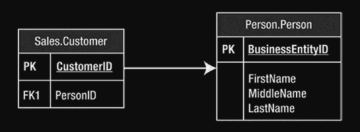

In [ ]:
SELECT C.CustomerID, C.PersonID, P.BusinessEntityID ,P.LastName, P.FirstName
FROM Sales.Customer AS C INNER JOIN Person.Person AS P
ON C.PersonID=P.BusinessEntityID

incorrect Joins 

- in the On clause if we write 1=1 which is always true we get as result all the rows from table 1 matched with all the rows from table 2 which is also called the cartesian product.

### INNER JOIN ON MULTIPLE COLUMNS

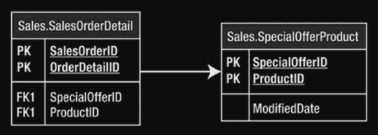

- typically used when the table we are joining on has a composite primary key and we have two foreign keys in the other table for the same
- IF WE USE ONLY ONE COLUMN WE WILL GET A CARTESIAN PRODUCT  because one column is not enough to uniquely identify the rows from table2

by using AND in the ON clause

In [ ]:
SELECT D.SalesOrderID, D.SalesOrderDetailID, O.ProductID, O.SpecialOfferID, O.ModifiedDate
FROM Sales.SalesOrderDetail AS D INNER JOIN Sales.SpecialOfferProduct AS O 
ON D.SpecialOfferID=O.SpecialOfferID AND D.ProductID=O.ProductID;

### joining on three or more tables

- required in many to many relationships where we have an intermediate table facilitating this relationship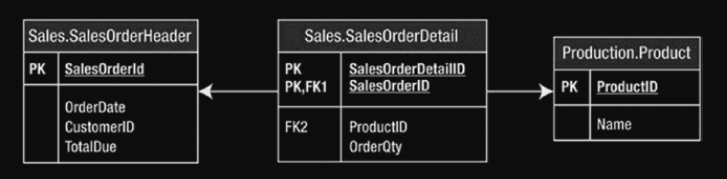
- suppose you have a table listing college courses and a table listing students. You would need a third table that records which students take which courses. To join courses to students, your query will join all three tables
- suppose you want to see a list of the product names for each order, along with the OrderDate column. This query requires the Sales.SalesOrderHeader, Sales.SalesOrderDetail, and Production.Product tables.

syntax

> SELECT \<LIST\> FROM \<TABLE1\>  
> INNER JOIN <span style="color: var(--vscode-foreground);">&lt;TABLE2&gt; ON TABLE1.COL1=TABLE2.COL2&nbsp;</span>    
> <span style="color: var(--vscode-foreground);">INNER JOIN &lt;TABLE3&gt; ON TABLE2.COL2=TABLE3.COL3</span>

In [ ]:
SELECT H.OrderDate, P.Name, H.CustomerID, D.OrderQty, C.PersonID, PER.FirstName+' '+PER.LastName
FROM Sales.SalesOrderHeader AS H
INNER JOIN Sales.SalesOrderDetail AS D ON H.SalesOrderID=D.SalesOrderID
INNER JOIN Production.Product AS P ON D.ProductID=P.ProductID
INNER JOIN Sales.Customer AS C ON H.CustomerID=C.CustomerID
INNER JOIN Person.Person AS PER ON C.PersonID=PER.BusinessEntityID;

### EXERCISE 5.1

Use the AdventureWorks2019.

1\. The HumanResources.Employee table does not contain the employee names. Join that table to the Person.Person table on the BusinessEntityID column. Display the job title, birth date, first name, and last name.

In [ ]:
SELECT E.JobTitle, E.BirthDate, P.FirstName, P.LASTNAME
FROM HumanResources.Employee AS E 
INNER JOIN Person.Person AS P ON E.BusinessEntityID=P.BusinessEntityID;

2\. The customer names also appear in the Person.Person table. Join the Sales.Customer table to the Person.Person table. The BusinessEntityID column in the Person.Person table matches the PersonID column in the Sales.Customer table. Display the CustomerID, StoreID, and TerritoryID columns along with the name columns.  
  
3\. Extend the query written in Question 2 to include the Sales. SalesOrderHeader table. Display the SalesOrderID column along with the columns already specified. The Sales.SalesOrderHeader table joins the Sales.Customer table on CustomerID.

In [ ]:
SELECT C.CustomerID, C.StoreID, C.TerritoryID, P.FirstName, P.LastName, H.SalesOrderID
FROM Sales.Customer AS C
INNER JOIN Person.Person AS P ON C.PersonID = P.BusinessEntityID
INNER JOIN Sales.SalesOrderHeader AS H ON C.CustomerID = H.CustomerID;

4\. Write a query that joins the Sales.SalesOrderHeader table to the Sales.SalesPerson table. Join the BusinessEntityID column from the Sales.SalesPerson table to the SalesPersonID column in the Sales. SalesOrderHeader table. Display the SalesOrderID along with the SalesQuota and Bonus.  
  
5\. Add the name columns to the query written in Question 4 by joining on the Person.Person table. See whether you can figure out which columns will be used to write the join.

In [ ]:
SELECT H.SalesOrderID, SP.Bonus, SP.SalesQuota, P.FirstName, P.LastName
FROM Sales.SalesPerson AS SP
INNER JOIN Sales.SalesOrderHeader AS H ON SP.BusinessEntityID=H.SalesPersonID
INNER JOIN Person.Person AS P ON P.BusinessEntityID=SP.BusinessEntityID;

### Left Outer join

- to retrieve the rows from one of the tables even if there is no match between the tables we are joining on 
- you may want to display all the customers along with their orders, including the customers who have not placed orders yet
- you must specify either LEFT or RIGHT.
- 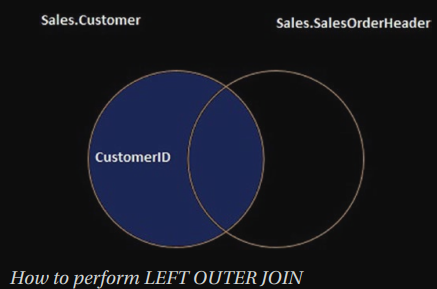
- syntax

> SELECT \<LIST\>  
> <span style="color: var(--vscode-foreground);">FROM &lt;TABLE1&gt;<br></span><span style="color: var(--vscode-foreground);">LEFT OUTER JOIN &lt;TABLE2&gt; ON TABLE1.COL1 = TABLE2.COL2</span>

In [ ]:
SELECT C.AccountNumber, S.SalesOrderID, S.OrderDate, P.FirstName, P.LastName, C.CustomerID
FROM Sales.Customer AS C 
LEFT OUTER JOIN Sales.SalesOrderHeader AS S ON C.CustomerID=S.CustomerID
LEFT OUTER JOIN Person.Person AS P ON C.PersonID=P.BusinessEntityID
WHERE C.CustomerID IN (11028,11029,1,2,3,4);

SELECT C.AccountNumber, S.SalesOrderID, S.OrderDate, P.FirstName, P.LastName, C.CustomerID
FROM Sales.Customer AS C 
LEFT OUTER JOIN Sales.SalesOrderHeader AS S ON C.CustomerID=S.CustomerID
RIGHT OUTER JOIN Person.Person AS P ON C.PersonID=P.BusinessEntityID
WHERE C.CustomerID IN (11028,11029,1,2,3,4);

SELECT C.AccountNumber, S.SalesOrderID, S.OrderDate, P.FirstName, P.LastName, C.CustomerID
FROM Sales.Customer AS C 
LEFT OUTER JOIN Sales.SalesOrderHeader AS S ON C.CustomerID=S.CustomerID
INNER JOIN Person.Person AS P ON C.PersonID=P.BusinessEntityID
WHERE C.CustomerID IN (11028,11029,1,2,3,4);

SELECT C.AccountNumber, P.FirstName, P.LastName, C.CustomerID, C.PersonID
FROM Sales.Customer AS C 
--LEFT OUTER JOIN Sales.SalesOrderHeader AS S ON C.CustomerID=S.CustomerID
LEFT OUTER JOIN Person.Person AS P ON C.PersonID=P.BusinessEntityID
WHERE C.CustomerID IN (11028,11029,1,2,3,4);

SELECT * 
FROM Sales.Customer WHERE CustomerID IN (1,2,3,4);

IF DOING OUTER JOIN THE LOGIC MAY REQUIRE ALL THE JOINS TO BE LEFT OUTER OR RIGHT OUTER  
in the three queries above both the joins need to be left outer if we <span style="color: var(--vscode-foreground);">want to display all the customers along with their orders, including the customers who have not placed orders yet</span>

<span style="color: var(--vscode-foreground);">AS WE CAN SEE THE CUSTOMER ID 1,2,3 and 4 dont have a person ID there fore we get a null<br><br></span>If the tables have the primary and foreign keys defined, the table joining with the primary key will usually be the table on the left side in a LEFT OUTER JOIN. Figure out which table must have rows returned even if there is not a match. That table must show up on the left side of a LEFT OUTER JOIN.<span style="color: var(--vscode-foreground);"><br></span>

### Right Outer Join

RIGHT OUTER JOIN differs from LEFT OUTER JOIN in just the location of the tables.

- syntax

> SELECT \<LIST\>  
> <span style="color: var(--vscode-foreground);">FROM &lt;TABLE1&gt;<br></span><span style="color: var(--vscode-foreground);">RIGHT OUTER JOIN &lt;TABLE2&gt; ON TABLE1.COL1 = TABLE2.COL2</span>

### USING OUTER JOIN TO FIND THE ROWS WITH NO MATCH

syntax

> SELECT \<LIST\>  
> <span style="color: var(--vscode-foreground);">FROM &lt;TABLE1&gt;<br></span><span style="color: var(--vscode-foreground);">LEFT OUTER JOIN &lt;TABLE2&gt; ON TABLE1.COL1 =TABLE2.COL2<br></span><span style="color: var(--vscode-foreground);">WHERE COL2 IS NULL</span>

In [ ]:
SELECT C.AccountNumber, S.SalesOrderID, S.OrderDate,  C.CustomerID
FROM Sales.Customer AS C 
LEFT OUTER JOIN Sales.SalesOrderHeader AS S ON C.CustomerID=S.CustomerID
WHERE S.CustomerID IS NULL;

### Adding a Table to thr Right of a left join

- we can display all the customers and their orders even if the order was not placed via a left join
- but if we want to display the product id from a third table for the orders that were placed we need another left outer join
- if we do an inner we wont get all the customers because all customers dont have orders

In [ ]:
SELECT C.CustomerID, H.SalesOrderID, D.ProductID, D.OrderQty, D.UnitPrice, H.OrderDate , P.Name
FROM Sales.Customer AS C 
LEFT OUTER JOIN Sales.SalesOrderHeader AS H ON H.CustomerID=C.CustomerID
LEFT OUTER JOIN Sales.SalesOrderDetail AS D ON H.SalesOrderID=D.SalesOrderID
LEFT OUTER JOIN Production.Product AS P ON P.ProductID=D.ProductID
WHERE C.CustomerID IN (11028,11029,1,2,3,4);

### FULL OUTER JOIN = LEFT OUTER + RIGHT OUTER - INNER JOIN

### CROSS JOIN == CARTESIAN PRODUCT OF THE TWO TABLES

- You might write a CROSS JOIN query to populate a table for a special purpose such as an inventory worksheet. You may need a list of every product in every possible location to create forms for the inventory crew.
- doesnt require a join condition
- SELECT \<LIST\> FROM TABLE1 CROSS JOIN TABLE2

### SELF JOIN

- EMPLOYEE EXAMPLE
    - Normally, the EmployeeID would be a primary key column, and the ManagerID would be a foreign key pointing back to the same table. This would ensure that only an existing EmployeeID could be added to the ManagerID column. Every employee, except for one, has a manager—another employee appearing in the same table. The one employee with no manager is the CEO of Adventure Works. in this case we use the self join
    - Another way to do the same thing is the HIERARCHYID
    - their doesnt need to be a foreign key from a table to itself for us to do a self join
- syntax

> SELECT T.COL1, T.COL2  
> <span style="color: var(--vscode-foreground);">FROM &lt;TABLE 1&gt; AS T<br></span><span style="color: var(--vscode-foreground);">LEFT OUTER JOIN &lt;TABLE 1&gt; AS TT ON T.COL1=TT.COL2</span>

### EXERCISE 5.2  
Use the AdventureWorks2019 database to complete Questions 1 through 5. Switch to the WideWorldImporters database to complete this exercise.

1\. Write a query that displays all the products along with the SalesOrderID even if an order has never been placed for that product. Join to the Sales.SalesOrderDetail table using the ProductID column.

In [ ]:
SELECT P.Name, P.Name, D.SalesOrderID
FROM Production.Product AS P
LEFT OUTER JOIN Sales.SalesOrderDetail AS D ON D.ProductID=P.ProductID;

2\. Write a query that returns all the rows from the Sales.SalesPerson table joined to the Sales.SalesOrderHeader table along with the SalesOrderID column even if no orders match. Include the SalesPersonID, SalesYTD, and SalesOrderID columns in the results  
3\. Change the query written in Question 3 so that the salesperson’s name also displays from the Person.Person table.

In [ ]:
SELECT P.BusinessEntityID, H.SalesPersonID, P.SalesYTD, H.SalesOrderID
FROM Sales.SalesPerson AS P
LEFT OUTER JOIN Sales.SalesOrderHeader AS H ON H.SalesPersonID=P.BusinessEntityID;

SELECT P.BusinessEntityID, H.SalesPersonID, P.SalesYTD, H.SalesOrderID, PER.LastName, PER.FirstName
FROM Sales.SalesPerson AS P
LEFT OUTER JOIN Sales.SalesOrderHeader AS H ON H.SalesPersonID=P.BusinessEntityID
LEFT OUTER JOIN Person.Person AS PER ON PER.BusinessEntityID=P.BusinessEntityID;

4\. The Sales.SalesOrderHeader table contains foreign keys to the Sales.CurrencyRate and Purchasing.ShipMethod tables. Write a query joining all three tables, and make sure it contains all rows from Sales.SalesOrderHeader. Include the CurrencyRateID, AverageRate, SalesOrderID, and ShipBase columns

In [ ]:
SELECT CR.CurrencyRateID, H.CurrencyRateID, SM.ShipMethodID, H.ShipMethodID, CR.AverageRate, H.SalesOrderID, SM.ShipBase
FROM SALES.SalesOrderHeader AS H 
LEFT OUTER JOIN Sales.CurrencyRate AS CR ON CR.CurrencyRateID=H.CurrencyRateID
LEFT OUTER JOIN Purchasing.ShipMethod AS SM ON SM.ShipMethodID=H.ShipMethodID;

5\. SWITCH TO WORLDWIDEIMPORTERS Write a self-join on the Sales.Customers table joining the BillToCustomerID to the CustomerID. How many locations does the corporate accounting office handle for billing for Tailspin Toys? Hint: You need to count the number of locations where the BillToCustomerID=1.

In [ ]:
SELECT HomeOffice.CustomerName AS HomeOfficeCustName
 ,Stores.CustomerName AS StoresCustNames
 ,HomeOffice.CustomerID AS HomeOfficeCustID
 ,Stores.CustomerID AS StoresCustID
FROM Sales.Customers as HomeOffice
INNER JOIN Sales.Customers as Stores
 ON HomeOffice.CustomerID = Stores.BillToCustomerID
WHERE Stores.BillToCustomerID = 1;

SELECT COUNT(*)
FROM Sales.Customers as HomeOffice
INNER JOIN Sales.Customers as Stores
 ON HomeOffice.CustomerID = Stores.BillToCustomerID
WHERE Stores.BillToCustomerID = 1;

- when we join tables there are three ways the database engine can handle it, and a way is chosen by the optimizer that is the fastest way
    - merge join
    - hash match
    - nested loops

merge join

- used when the optimizer estimates that a large number of rows will be returned from both sides of the join, and the data is sorted on the join key
- In the AdventureWorks2019 database, the Sales. SalesOrderHeader table joins to the Sales.SalesOrderDetail table on SalesOrderID. This column is the primary key of the Sales.SalesOrderHeader table and the first column of the primary key of the Sales.SalesOrderDetail table. The primary keys are also used as the clustered index keys; therefore, each of those tables is sorted by the SalesOrderID column
- so the following query returns data using the merge join and that can be seen in the execution plan
- as this query is processes the salesorderid of the two sides is compared and when there is a match the combine row is returned
- they are sorted and matched with a two pointer approach

<span style="background-color: rgba(127, 127, 127, 0.1);">SELECT SOH.SalesOrderID, SOD.OrderQty, SOD.ProductID</span>  
<span style="background-color: rgba(127, 127, 127, 0.1);">FROM Sales.SalesOrderHeader AS SOH</span>  
<span style="background-color: rgba(127, 127, 127, 0.1);">INNER JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID;</span>

nested loops

- used when the optimizer estimates that one side returns small number of rows
- the following query results in a nested loop execution

<span style="background-color: rgba(127, 127, 127, 0.1);">SELECT SOH.SalesOrderID, SOD.OrderQty, SOD.ProductID</span>  
<span style="background-color: rgba(127, 127, 127, 0.1);">FROM Sales.SalesOrderHeader AS SOH</span>  
<span style="background-color: rgba(127, 127, 127, 0.1);">INNER JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID WHERE SOH.CustomerID = 11000;</span>

hash match

- used when the optimizer estimates that a large number of rows will be returned from each side of the join, and the input is not sorted on the joining columns.
- a hash table is created with the smaller input then the larger input probe the hash table to look for matches
- query for example

SELECT C.CustomerID, TotalDue  
FROM Sales.Customer AS C  
JOIN Sales.SalesOrderHeader S ON C.CustomerID = S.CustomerID

### SUBQUERIES CTEs AND UNIONS

subqueries and CTEs as another way to combine multiple tables together besides join

union allows us to join the result of two queries into one result

### Subquery

- written in the where clause of another query
- can be used to find the rows in one table that match some rows from another table based on some criterion
- we can for example display a list of all customers who have placed an order without joining the customer and orders table

SUBQUERY FROM IN

<span style="color: var(--vscode-foreground);">we can provide the result from query to be IN the where clause of the outer query like so</span>

syntax

SELECT \<LIST\>   
<span style="color: var(--vscode-foreground);">FROM &lt;TABLE1&gt;<br></span><span style="color: var(--vscode-foreground);">WHERE &lt;COL1&gt; IN (<br></span>        <span style="color: var(--vscode-foreground);">&nbsp; &nbsp; SELECT &lt;COL2&gt;&nbsp;<br></span>          <span style="color: var(--vscode-foreground);">&nbsp; &nbsp; FROM &lt;TABLE2&gt;);</span>

In [ ]:
SELECT C.CustomerID, C.PersonID--, P.FirstName, P.LastName
FROM Sales.Customer AS C 
--INNER JOIN Person.Person AS P ON P.BusinessEntityID=C.PersonID 
WHERE C.CustomerID IN(
    SELECT H.CustomerID
    FROM Sales.SalesOrderHeader AS H
);

- in the above query column from the salesOrderHeader table can not be out-putted in the result
- AND the major difference the customers only show up once in the rsult and not once for each order
- the subquery must only return one column that is, h.custinerID in this example

SUBQUERY FROM NOT IN

- to find the rows that dont match
- for example the customers who have not placed an order

In [ ]:
SELECT C.CustomerID, C.PersonID, P.FirstName, P.LastName
FROM Sales.Customer AS C 
LEFT OUTER JOIN Person.Person AS P ON P.BusinessEntityID=C.PersonID 
WHERE C.CustomerID NOT IN(
    SELECT H.CustomerID
    FROM Sales.SalesOrderHeader AS H
);

select * from Sales.Customer ORDER by CustomerID;

SUBQUERY WITH NULLS AND NOT IN

- if the subquery returns nulls using NOT IN will result in no rows produced
- lets say the subquery returns (null,1,2,3) and the outer query is checking the values (1,2,10) to not be in the result of the inner query
- the databse engine can not tell if 10 is null or not

In [ ]:
SELECT CurrencyRateID, FromCurrencyCode, ToCurrencyCode
FROM Sales.CurrencyRate as cr
WHERE CurrencyRateID NOT IN
 (SELECT CurrencyRateID
 FROM Sales.SalesOrderHeader);

SELECT CurrencyRateID, FromCurrencyCode, ToCurrencyCode
FROM Sales.CurrencyRate
WHERE CurrencyRateID NOT IN
 (SELECT CurrencyRateID
 FROM Sales.SalesOrderHeader
 WHERE CurrencyRateID IS NOT NULL);

- we need to explicitly handle nulls like we did in the above queries
- always handle nulls when doing NOT IN in subqueries

SUBQUERY WITH EXISTS

- joins the result of the subquery with the table in the outer query, they are called correlated subqueries
- this performs better as well
- this way the inner query can see the columns of the table in the outer query as well and we can write where conditions using those columns as well
- If a row (satisfying the inner condition) is returned when using EXISTS, the subquery returns TRUE and the outer row is returned.
- Conversely, if no rows are returned, NOT EXISTS returns TRUE and the row from the outer query is returned.

In [ ]:
SELECT cust.CustomerID, cust.AccountNumber, p.FirstName
FROM Sales.Customer AS Cust
inner join Person.Person as p on cust.PersonID=p.BusinessEntityID
WHERE EXISTS
 (SELECT* FROM Sales.SalesOrderHeader AS SOH
 WHERE SOH.CustomerID = Cust.CustomerID);
-- customers that have placed an order

SELECT cust.CustomerID, cust.AccountNumber, p.FirstName
FROM Sales.Customer AS Cust
left outer join Person.Person as p on cust.PersonID = p.BusinessEntityID
WHERE NOT EXISTS
 (SELECT * FROM Sales.SalesOrderHeader AS SOH
 WHERE SOH.CustomerID = Cust.CustomerID);
--customers that havent

JOINING QUERIES USING CROSS APPLY AND OUTER APPLY 

- These join the results as well, we can use the columns from the outer query in the inner query
- allows us to access the columns returned from the inner query via the alias we give to the apply
- the inner query runs once for each row in the outer query
- difference between cross apply and outer apply is that 
    - cross apply returns the rows from the outer query only if there is a match
    - outer apply will return the results from even if there is no match

In [ ]:
-- customers that have placed an order
SELECT cust.CustomerID, cust.AccountNumber, A.SalesOrderID, a.OrderDate, p.FirstName
FROM Sales.Customer AS Cust
INNER join Person.Person as p on cust.PersonID=p.BusinessEntityID
CROSS APPLY(SELECT soh.SalesOrderID,SOH.OrderDate
FROM Sales.SalesOrderHeader AS SOH
WHERE Cust.CustomerID = SOH.CustomerID) AS A
ORDER by Cust.CustomerID;

--customers that havent placed an order
SELECT cust.CustomerID, cust.AccountNumber, A.SalesOrderID, a.OrderDate, p.FirstName
FROM Sales.Customer AS Cust
left outer join Person.Person as p on p.BusinessEntityID=Cust.PersonID
OUTER APPLY(SELECT SOH.SalesOrderID, SOH.OrderDate
FROM Sales.SalesOrderHeader AS SOH
WHERE Cust.CustomerID = SOH.CustomerID) AS A
ORDER by Cust.CustomerID;

- we can return as many rows as we want in the inner query

pg 228 writing union queries